### Logistic Regression
- Data Preperation
- Visualisation
- Create Train & Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary
- How to use sk - learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data - Generate using Numpy
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


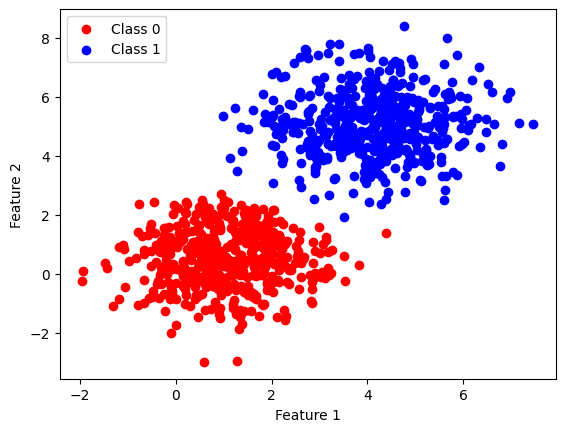

In [3]:
plt.scatter(dist_01[: ,0], dist_01[:, 1], color = 'red', label = "Class 0")
plt.scatter(dist_02[: ,0], dist_02[:, 1], color = 'blue', label = "Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000, 3))

In [5]:
data[: 500, : 2] = dist_01
data[500 : , : 2] = dist_02

data[500 : , -1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[: 10, :])

[[ 1.90795264  0.71544612  0.        ]
 [ 1.59032996  1.56372394  0.        ]
 [ 4.77939394  2.78669222  1.        ]
 [ 1.61872764  2.05007656  0.        ]
 [ 2.84497706 -0.2673954   0.        ]
 [ 1.31822426  0.03616003  0.        ]
 [ 0.64377165  1.22829746  0.        ]
 [ 1.57942896  1.54384393  0.        ]
 [ 4.42210905  3.99890082  1.        ]
 [-0.24299878 -0.66148592  0.        ]]


In [7]:
split = int(0.8 * data.shape[0])
X_train = data[:split, : -1]
X_test = data[split : , : -1]

Y_train = data[: split, -1]
Y_test = data[split : , -1]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


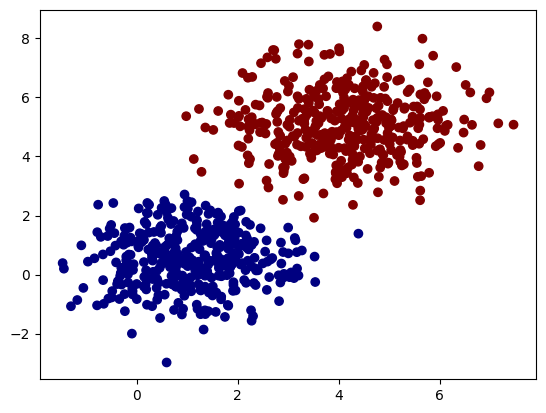

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap= plt.cm.jet)
plt.show()

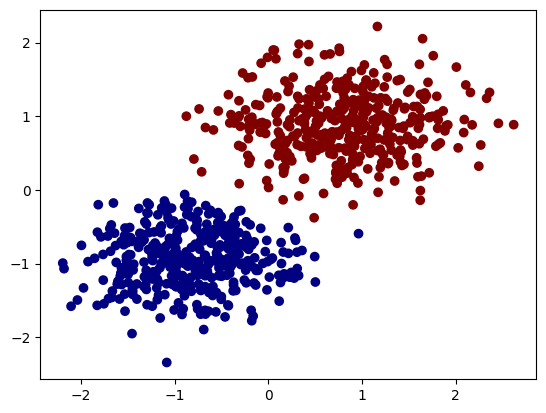

In [9]:
# Data Normalization

x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis=0)

X_train = (X_train - x_mean) / x_std

X_test = (X_test - x_mean) / x_std
# Test data is also normalized according to same mean and std which was use to normalize training data.

plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap= plt.cm.jet)


### Logistic Regression Implementaion

In [10]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))

def hypothesis(X, theta):
    """
    X - entire array(m , n + 1)
    theta - np.array(n + 1, 1)
    """
    
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    """
    params:
    X - (m, n + 1)
    y - (m, 1)
    theta - (n + 1 ,1)

    return scale_value = loss 
    """
    y_ = hypothesis(X, theta)
    e = -1 * np.mean((y * np.log(y_)) + ((1- y) * np.log((1- y_))))

    return e

In [11]:
def gradient(X, y, theta):
    """
    params:
    X - (m, n + 1)
    Y - (m, 1)
    theta - (n + 1, 1)

    return :
        gradient_vextor = (n + 1, 1)
    """

    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hi))
    m = X.shape[0]
    return grad / m 

def gradient_descent(X, y, lr = 0.5, max_itr = 500):
    theta = np.zeros((X.shape[1], 1))
    error_list = []

    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)

        # Update 
        theta = theta - (lr * grad)

    return theta, error_list

In [12]:
ones = np.ones((X_train.shape[0], 1))
X_New_train = np.hstack((ones, X_train))

Y_train = Y_train.reshape((-1, 1))

In [13]:
theta, error_list = gradient_descent(X_New_train, Y_train)

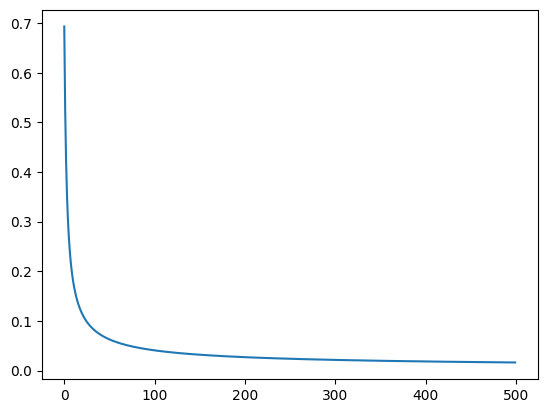

In [14]:
plt.plot(error_list)
plt.show()

In [15]:
theta

array([[0.54785536],
       [2.80523267],
       [4.91218868]])

### Visualize Decision Surface

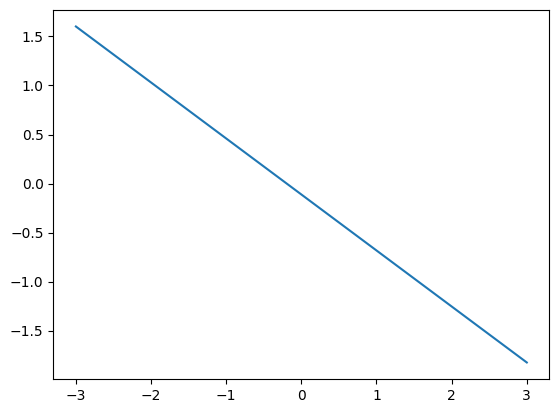

In [16]:
x1 = np.arange(-3, 4)
x2 = - (theta[0] + theta[1] * x1)/theta[2]

plt.plot(x1, x2)
plt.show()

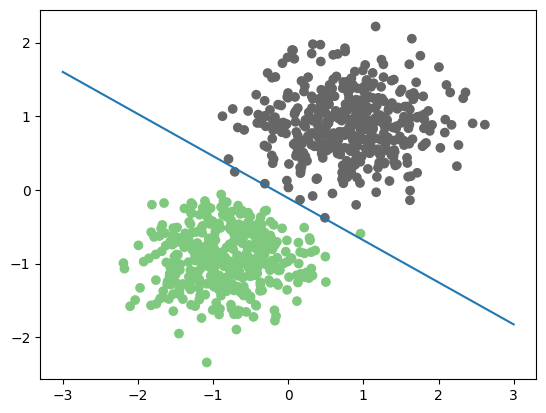

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, )), cmap = plt.cm.Accent)
plt.plot(x1, x2)
plt.show()

### Predictions and Accuracy

In [18]:
X_New_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_New_test.shape)
print(X_New_test[: 5, :])

(200, 3)
[[ 1.         -0.69478592 -1.33378812]
 [ 1.          0.10578341  1.28320933]
 [ 1.          0.19677083  1.82759356]
 [ 1.          1.37201065  0.38005008]
 [ 1.         -1.07690905 -0.97604596]]


In [19]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)

    output[h >= 0.5] = 1
    output = output.astype('int')
    return output

XT_preds = predict(X_New_train, theta)
Xt_preds = predict(X_New_test, theta)

XT_preds.shape, Xt_preds.shape

((800, 1), (200, 1))

In [20]:
def accuracy(actual, preds) : 
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))

    acc = np.sum(actual == preds)/ actual.shape[0]

    return acc * 100.0

In [21]:
train_acc = accuracy(Y_train, XT_preds)
test_acc = accuracy(Y_test, Xt_preds)

print(f"Accuracy on training data is {train_acc}")
print(f"Accuracy on testing data is {test_acc}")

Accuracy on training data is 99.75
Accuracy on testing data is 100.0


### How to use Sk - Learn?

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0, theta_s)

[0.58906209] [[2.5054649  4.82676615]]


In [26]:
model.score(X_train, Y_train)

0.99625

In [27]:
model.score(X_test, Y_test)

1.0

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.])